In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties

# matplotlib.style.use('ggplot')
import matplotlib
# matplotlib.style.use('ggplot')
#matplotlib.style.use('default')
from numpy import *
import numpy as np
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 6)
import subprocess,shlex,sys,select,re,StringIO
def readHive(sql):
    text = ''
    err = ''
    cmd = shlex.split('hive -e '+ '"set mapreduce.job.queuename=zampda_job;set hive.cli.print.header=true;'+sql+'"')
    print >>sys.stderr, cmd
    sys.stderr.flush()
    proc = subprocess.Popen(cmd, bufsize=0, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    while proc.poll() is None:
        ins, outs, errs = select.select([proc.stdout, proc.stderr], [], [])
        if proc.stdout in ins:
            text += proc.stdout.read()
        if proc.stderr in ins:
            c = proc.stderr.read(1)
            if c == '\n':
                print >>sys.stderr, err
                sys.stderr.flush()
                err = ''
            else:
                err += c
    text += proc.stdout.read()
    print >>sys.stderr, proc.stderr.read()
    sys.stderr.flush()
    header, content = text.split('\n',1)
    header = re.sub('\w*\.','', header)
    return pd.read_table(StringIO.StringIO(header+'\n'+content), error_bad_lines = False)

def f(x):
    x=str(x)
    tmp=x.split("//")
    if len(tmp)<=1:
        return x
    return '.'.join(x.strip().split('//')[1].split('/')[0].split('.')[-2:])


Populating the interactive namespace from numpy and matplotlib


In [2]:
adslot=readHive("select vendor_id,adslot_id,count(1) from fraud_free.dclkv2 where year=2016 and month=10 and day=8 group by vendor_id, adslot_id")

['hive', '-e', 'set mapreduce.job.queuename=zampda_job;set hive.cli.print.header=true;select vendor_id,adslot_id,count(1) from fraud_free.dclkv2 where year=2016 and month=10 and day=8 group by vendor_id, adslot_id']

Logging initialized using configuration in file:/var/bh/lib/apache-hive-1.2.1-bin/conf/hive-log4j.properties
Query ID = changbin_20161009174207_1c41053a-9d2b-437b-b872-c31aee803ec0
Total jobs = 1
Launching Job 1 out of 1
Number of reduce tasks not specified. Estimated from input data size: 1
In order to change the average load for a reducer (in bytes):
  set hive.exec.reducers.bytes.per.reducer=<number>
In order to limit the maximum number of reducers:
  set hive.exec.reducers.max=<number>
In order to set a constant number of reducers:
  set mapreduce.job.reduces=<number>
Starting Job = job_1471856463785_1077890, Tracking URL = http://TS-NN-001:50030/proxy/application_1471856463785_1077890/
Kill Command = /var/bh/hadoop/bin/hadoop job  -kill job_1471856463785_1077890
Hadoo

In [5]:
adslot['_c2'].quantile([.80,.90,.95,.99])

0.80     13.00
0.90     31.00
0.95     70.00
0.99    345.15
Name: _c2, dtype: float64

In [128]:
mc=readHive("select * from fraud_free.dclkv2 where year=2016 and month=8 and day>=1 and adgroup_id=23377")

['hive', '-e', 'set mapreduce.job.queuename=zampda_job;set hive.cli.print.header=true;select * from fraud_free.dclkv2 where year=2016 and month=8 and day>=1 and adgroup_id=23377']

Logging initialized using configuration in file:/var/bh/lib/apache-hive-1.2.1-bin/conf/hive-log4j.properties
Query ID = changbin_20160930110432_24fd2e20-350b-4d21-9668-1d2353af12e2
Total jobs = 1
Launching Job 1 out of 1
Number of reduce tasks is set to 0 since there's no reduce operator
Starting Job = job_1471856463785_869340, Tracking URL = http://TS-NN-001:50030/proxy/application_1471856463785_869340/
Kill Command = /var/bh/hadoop/bin/hadoop job  -kill job_1471856463785_869340
Hadoop job information for Stage-1: number of mappers: 251; number of reducers: 0
2016-09-30 11:07:05,109 Stage-1 map = 0%,  reduce = 0%
2016-09-30 11:07:23,441 Stage-1 map = 1%,  reduce = 0%, Cumulative CPU 30.99 sec
2016-09-30 11:07:24,478 Stage-1 map = 2%,  reduce = 0%, Cumulative CPU 80.28 sec
2016-09-30 11:07:26,557 Stage-1 map

In [133]:
mc.query("fraud_flag==fraud_flag")['request_id'].value_counts()

hcmxh7g5jcc44    3
zjublmwrp2iww    2
25imsk4a2yll4    2
ced2dsu5b24tw    2
vcs2fbbuiljvc    2
ccyqm2ssz2k3k    2
yr44y3w7ywxra    2
3fxothwjnrpjy    2
ikoa3i7ikdn36    2
n35ar2vjgslks    1
qolrdtl6ajekq    1
hv3fubwmue6ri    1
eilbtc2v5blwg    1
ty4qqj6dtdgw6    1
rvatuk4vdt7ss    1
zjhw6gpaw6n4k    1
tuqqxhzc4bqzc    1
66aqkblhquzpc    1
srbk4pfzfriye    1
cidtoarz2ayws    1
7hgpsw7rgy4og    1
tkknegofy5osk    1
54277yj6knsp2    1
iuobaa7sz5yzc    1
3zbwutxvq5zgm    1
mipgyfrwrx5ni    1
rvwq32f5qlgqk    1
h5uu2t4j5ejv4    1
dfeziwkwkc2wk    1
mrcif6fryvin2    1
                ..
kyhquwsrekhy6    1
5rpmmj4u4p5os    1
cxiy6ql7lql3q    1
vnst2psqyhnam    1
qqlgy6rouxzsi    1
u4l3azq2kbic6    1
4cy3qzu5vqh4a    1
p5laeevo2q2ki    1
bgzwvhpwxyxf4    1
oc4gxwpcbobxq    1
rflzamxz7zuku    1
kv63j4hjnw4ps    1
mom4ntdsmwtdq    1
ww634pupzyvbe    1
bgtcslvzx3lfe    1
dqkdvh3ds5xzk    1
5rrdzf66nyp3w    1
cyg5h5mt6jz74    1
t6v4ormjxbhie    1
5z7vsiyqlwveo    1
xbk3myv7uu37y    1
totcuhwhift2

In [41]:
clk=readHive("select * from fraud_free.dclkv2 where year=2016 and month=9 and day=10")
clk['domain']=clk['url'].apply(f)
ld=readHive("select * from etl_output.landing where year=2016 and month=9 and day=10")
join=pd.merge(clk,ld,on="request_id",how='inner')

['hive', '-e', 'set mapreduce.job.queuename=zampda_job;set hive.cli.print.header=true;select * from fraud_free.dclkv2 where year=2016 and month=9 and day=10']

Logging initialized using configuration in file:/var/bh/lib/apache-hive-1.2.1-bin/conf/hive-log4j.properties
OK
conds, Fetched: 195984 row(s)

['hive', '-e', 'set mapreduce.job.queuename=zampda_job;set hive.cli.print.header=true;select * from etl_output.landing where year=2016 and month=9 and day=10']

Logging initialized using configuration in file:/var/bh/lib/apache-hive-1.2.1-bin/conf/hive-log4j.properties
OK
econds, Fetched: 38506 row(s)



In [42]:
print "clean:",clk.query('domain=="17k.com" & fraud_flag!=fraud_flag & adslot_id=="mm_45806929_4200163_14420407"')['request_id'].count()
print "clean arr:",join.query('domain=="17k.com" & fraud_flag!=fraud_flag& adslot_id=="mm_45806929_4200163_14420407"')['request_id'].count()
print "clean zid:",clk.query('domain=="17k.com" & fraud_flag!=fraud_flag& adslot_id=="mm_45806929_4200163_14420407"')['zid'].nunique()
print "clean request id:",clk.query('domain=="17k.com" & fraud_flag!=fraud_flag& adslot_id=="mm_45806929_4200163_14420407"')['request_id'].nunique()

print "wash:",clk.query('domain=="17k.com" & fraud_flag==fraud_flag& adslot_id=="mm_45806929_4200163_14420407"')['request_id'].count()
print "wash arr:",join.query('domain=="17k.com" & fraud_flag==fraud_flag& adslot_id=="mm_45806929_4200163_14420407"')['request_id'].count()
print "wash zid:",clk.query('domain=="17k.com" & fraud_flag==fraud_flag& adslot_id=="mm_45806929_4200163_14420407"')['zid'].nunique()
print "wash request id:",clk.query('domain=="17k.com" & fraud_flag==fraud_flag& adslot_id=="mm_45806929_4200163_14420407"')['request_id'].nunique()






clean: 195
clean arr: 14
clean zid: 157
clean request id: 169
wash: 12
wash arr: 1
wash zid: 10
wash request id: 11


In [33]:
clk=readHive("select * from fraud_free.dclkv2 where year=2016 and month=9 and day=28")
clk['domain']=clk['url'].apply(f)
ld=readHive("select * from etl_output.landing where year=2016 and month=9 and day=28")
join=pd.merge(clk,ld,on="request_id",how='inner')

['hive', '-e', 'set mapreduce.job.queuename=zampda_job;set hive.cli.print.header=true;select * from fraud_free.dclkv2 where year=2016 and month=9 and day=28']

Logging initialized using configuration in file:/var/bh/lib/apache-hive-1.2.1-bin/conf/hive-log4j.properties
OK
 seconds, Fetched: 519440 row(s)

['hive', '-e', 'set mapreduce.job.queuename=zampda_job;set hive.cli.print.header=true;select * from etl_output.landing where year=2016 and month=9 and day=28']

Logging initialized using configuration in file:/var/bh/lib/apache-hive-1.2.1-bin/conf/hive-log4j.properties
OK
244 seconds, Fetched: 110998 row(s)



In [39]:
print "clean:",clk.query('domain=="17k.com" & fraud_flag!=fraud_flag & adslot_id=="mm_45806929_4200163_14420407"')['request_id'].count()
print "clean arr:",join.query('domain=="17k.com" & fraud_flag!=fraud_flag& adslot_id=="mm_45806929_4200163_14420407"')['request_id'].count()
print "clean zid:",clk.query('domain=="17k.com" & fraud_flag!=fraud_flag& adslot_id=="mm_45806929_4200163_14420407"')['zid'].nunique()
print "clean request id:",clk.query('domain=="17k.com" & fraud_flag!=fraud_flag& adslot_id=="mm_45806929_4200163_14420407"')['request_id'].nunique()

print "wash:",clk.query('domain=="17k.com" & fraud_flag==fraud_flag& adslot_id=="mm_45806929_4200163_14420407"')['request_id'].count()
print "wash arr:",join.query('domain=="17k.com" & fraud_flag==fraud_flag& adslot_id=="mm_45806929_4200163_14420407"')['request_id'].count()
print "wash zid:",clk.query('domain=="17k.com" & fraud_flag==fraud_flag& adslot_id=="mm_45806929_4200163_14420407"')['zid'].nunique()
print "wash request id:",clk.query('domain=="17k.com" & fraud_flag==fraud_flag& adslot_id=="mm_45806929_4200163_14420407"')['request_id'].nunique()


 clean: 8940
clean arr: 1289
clean zid: 8860
clean request id: 8882
wash: 114
wash arr: 16
wash zid: 114
wash request id: 114


In [53]:
err=pd.read_table("./allerrs",sep='\t',header=None,names=["day","vendor","err","pv"])

In [79]:
errcode=pd.read_table('./errcode1',sep="\s+",header=None,names=["err","phase"])

In [145]:
join=pd.merge(err,errcode,on='err',how='inner')
join['err'].value_counts()

 0      242
 8      231
 20     224
 153    215
 152    215
 37     215
 106    211
 101    205
 104    196
-1      189
 21     185
 48     170
 9      161
 60     160
 61     151
 107    132
 109    107
 151    104
 1       99
 28      96
 43      96
 98      86
 14      82
 159     77
 16      74
 105     60
 99      57
 27      48
 154     48
 2       31
 44      24
 155     24
 4       22
 220     16
 5       12
 33      12
 47       9
 29       2
 32       1
 46       1
Name: err, dtype: int64

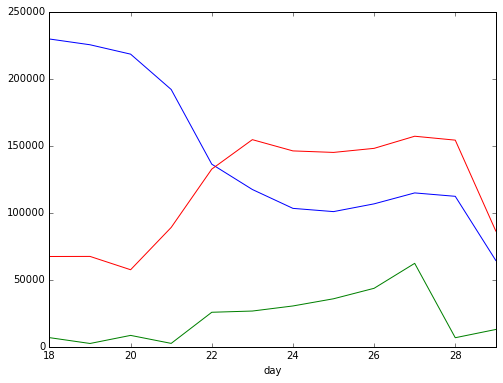

In [147]:
#("beforebroker","argumentor/searcher","broker","argumentor","router","searcher","robot","yielder","deliver")

ill=['("beforebroker","argumentor/searcher","broker","argumentor","router")','']

cap=['("searcher","robot","yielder","deliver")','']

budget=['("searcher","robot","yielder","deliver")','(8)']

robots=['("robot","yielder","deliver")','']

illp=join.query('phase in '+ill[0]+' & vendor==9 ').groupby('day')['pv'].sum().div(10000)
illp.plot()

bankp=join.query('err==20 & vendor==9 ').groupby('day')['pv'].sum().div(10000)
bankp.plot()

capp=join.query('phase in '+cap[0]+' & vendor==9 ').groupby('day')['pv'].sum().div(10000)
capp.plot()

# budgetp=join.query('phase in '+budget[0]+' & vendor==9 & err!=8 ').groupby('day')['pv'].sum().div(10000)
# budgetp.plot()

# rp=join.query('phase in '+robots[0]+' & vendor==9').groupby('day')['pv'].sum().div(10000)
# rp.plot()
# # err['err'].value_counts()

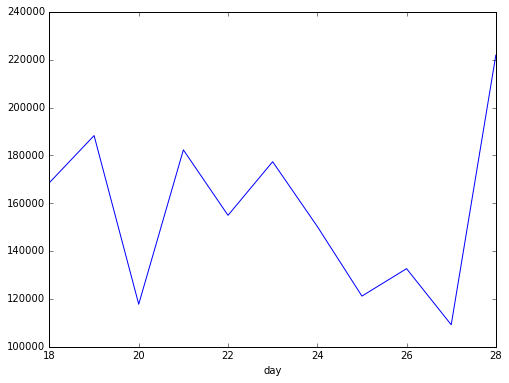

In [118]:


join.query('phase in ("robot","yielder","deliver") & vendor==9 ').groupby('day')['pv'].sum()
join=join.query('day!=29')
temp=join.query('phase in ("robot","yielder","deliver")').groupby('day')['pv'].sum().div(10000)
temp.plot()

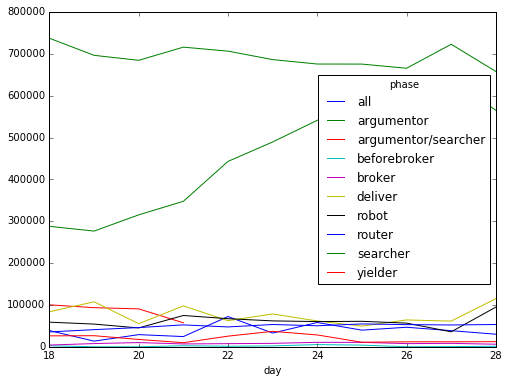

In [120]:
temp=join.groupby(['day','phase'])['pv'].sum().div(10000).reset_index()
p=temp.pivot(index='day', columns='phase', values='pv')
p.plot()

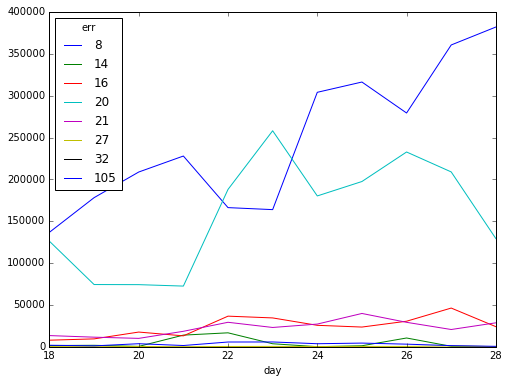

In [121]:
temp=join.query('phase =="searcher"').groupby(['day','err'])['pv'].sum().div(10000).reset_index()
p=temp.pivot(index='day', columns='err', values='pv')

p.plot()

In [152]:
temp=join.query('phase =="argumentor"').groupby(['day','err'])['pv'].sum().div(10000).reset_index()
p=temp.pivot(index='day', columns='err', values='pv')

temp=join.groupby(['day','err'])['pv'].sum().div(10000).reset_index()
temp=temp.pivot(index='day', columns='err', values='pv')
temp

err,-1,0,1,2,4,5,8,9,14,16,...,106,107,109,151,152,153,154,155,159,220
day,,,,,,,,,,,,,,,,,,,,,
18,0.4301,83716.6279,1346.1358,105.2261,0.0002,0.0006,136814.9852,26123.4443,1517.3622,7886.8909,...,541.1577,1888.2262,0.0084,9017.7921,93610.1366,216176.2625,12577.3042,27163.0100,395.2609,100270.0994
19,0.3281,107487.4325,5151.4917,98.1742,0.0007,0.0032,178180.7437,26532.8726,1787.5211,9462.8074,...,55.7818,NaN,0.0010,8626.8181,93111.9409,205859.7870,14506.1261,25886.0052,373.1087,93516.4712
20,0.3974,55211.6112,7580.2276,95.4076,0.0008,0.0069,208815.5397,17542.3113,484.1760,17610.2920,...,21.8677,NaN,0.0079,7385.8983,92381.6287,189238.1499,15371.7586,25219.3183,383.8769,90631.7625
21,0.8954,97721.2998,3425.6018,94.3945,0.0018,0.0075,227919.1570,9794.2984,13956.5236,13074.4442,...,407.8674,2086.3053,0.0018,7696.9246,90639.9600,168669.1678,15939.5336,25716.3199,440.8777,57343.0251
22,10.4862,62359.1260,2541.2621,95.3271,0.0018,0.0090,166286.1235,25465.6282,16706.9163,36614.4598,...,238.9513,1076.8294,0.0277,9175.0976,83690.4150,141409.4505,16024.9806,25440.7487,547.4434,NaN
23,2.1866,78521.4938,2663.1215,85.0908,0.0025,0.0033,163888.7644,36953.9223,3644.8647,34500.7634,...,389.9385,1689.0438,0.1135,9683.7865,65560.2464,99933.8192,16545.0500,26526.5911,537.8885,NaN
24,0.0993,61727.4965,3260.9127,104.4759,0.0019,0.0046,304052.1118,28319.1796,132.4348,25668.6621,...,1094.3658,4226.5736,NaN,8534.2690,58732.0501,96092.3728,15508.4513,28595.8805,1855.3282,NaN
25,0.1981,49451.7788,3448.3304,108.3218,0.0001,0.0085,316332.6944,10880.5685,1251.3559,23593.1103,...,894.7597,3094.3822,0.0003,8098.6538,57297.4606,97338.7352,17632.2119,27309.8016,6706.9530,NaN
26,0.1475,64146.4440,3528.3000,89.5814,0.0032,0.0091,279326.5124,11907.9743,10517.9590,30562.9013,...,67.0916,1.6324,0.0340,10059.7794,63299.0385,88552.1474,16819.3616,25194.4855,5346.1049,NaN
